In [72]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import PIL
import cv2 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [39]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [40]:
data_dir

'.\\datasets\\flower_photos'

In [43]:
import os 
correct_path = os.path.join(data_dir, "flower_photos")
if os.path.exists(correct_path):
    data_dir = correct_path
data_dir    

'.\\datasets\\flower_photos\\flower_photos'

In [22]:
image = plt.imread('datasets/flower_photos/flower_photos/daisy/5547758_eea9edfd54_n.jpg')
image.shape

(232, 320, 3)

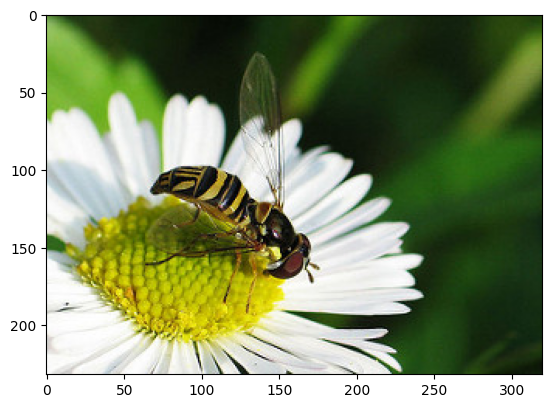

In [23]:
plt.imshow(image)

In [44]:
import pathlib
data_dir = pathlib.Path(data_dir) 
data_dir

WindowsPath('datasets/flower_photos/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'), WindowsPath('datasets/flower_photos/flower_pho

3670

In [46]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

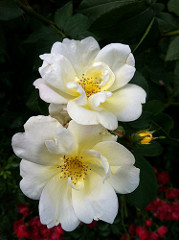

In [48]:
import PIL.Image


PIL.Image.open(roses[0])

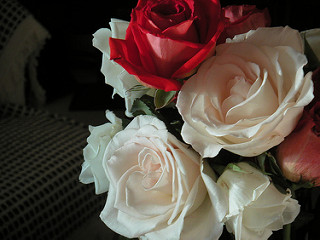

In [49]:
PIL.Image.open(roses[1])

In [50]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [51]:
flower_label_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [52]:
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [56]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [57]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [61]:
X , y = [] , []
for flower_name,flower_images in flower_images_dict.items():
    for image in flower_images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flower_label_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

[0 0 0 ... 4 4 4]


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [71]:
print(X_train[0])

[[[ 68  79  77]
  [ 63  70  63]
  [ 60  62  56]
  ...
  [ 49  40  37]
  [ 48  39  36]
  [ 48  39  36]]

 [[ 57  62  60]
  [ 61  64  60]
  [ 60  61  55]
  ...
  [ 48  39  36]
  [ 48  39  36]
  [ 50  41  38]]

 [[ 61  58  57]
  [ 64  64  59]
  [ 59  59  53]
  ...
  [ 49  40  37]
  [ 49  40  37]
  [ 50  41  38]]

 ...

 [[ 49 121  93]
  [ 40  65  51]
  [ 52  96  67]
  ...
  [156 216 211]
  [161 216 212]
  [169 203 206]]

 [[ 48 119  90]
  [ 45  58  44]
  [ 50  91  60]
  ...
  [217 233 238]
  [201 212 215]
  [185 168 175]]

 [[ 54 121  95]
  [ 46  58  46]
  [ 46  89  60]
  ...
  [227 245 248]
  [219 201 204]
  [108  81  83]]]


In [69]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2752
2752
918
918


In [67]:
X_train = X_train / 255 # normalize images
X_test = X_test / 255

2752